In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob, os

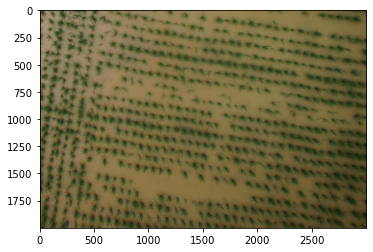

In [18]:
img = cv2.imread("Train_Dev/Train_Dev/training/DSC080454.JPG")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
data_csv

0     1
0      26    23
1       6   100
2     117    35
3     112   118
4      95   173
..    ...   ...
750  2846  1127
751  2838  1221
752  2826  1332
753  2796  1432
754  2791  1517

[755 rows x 2 columns]

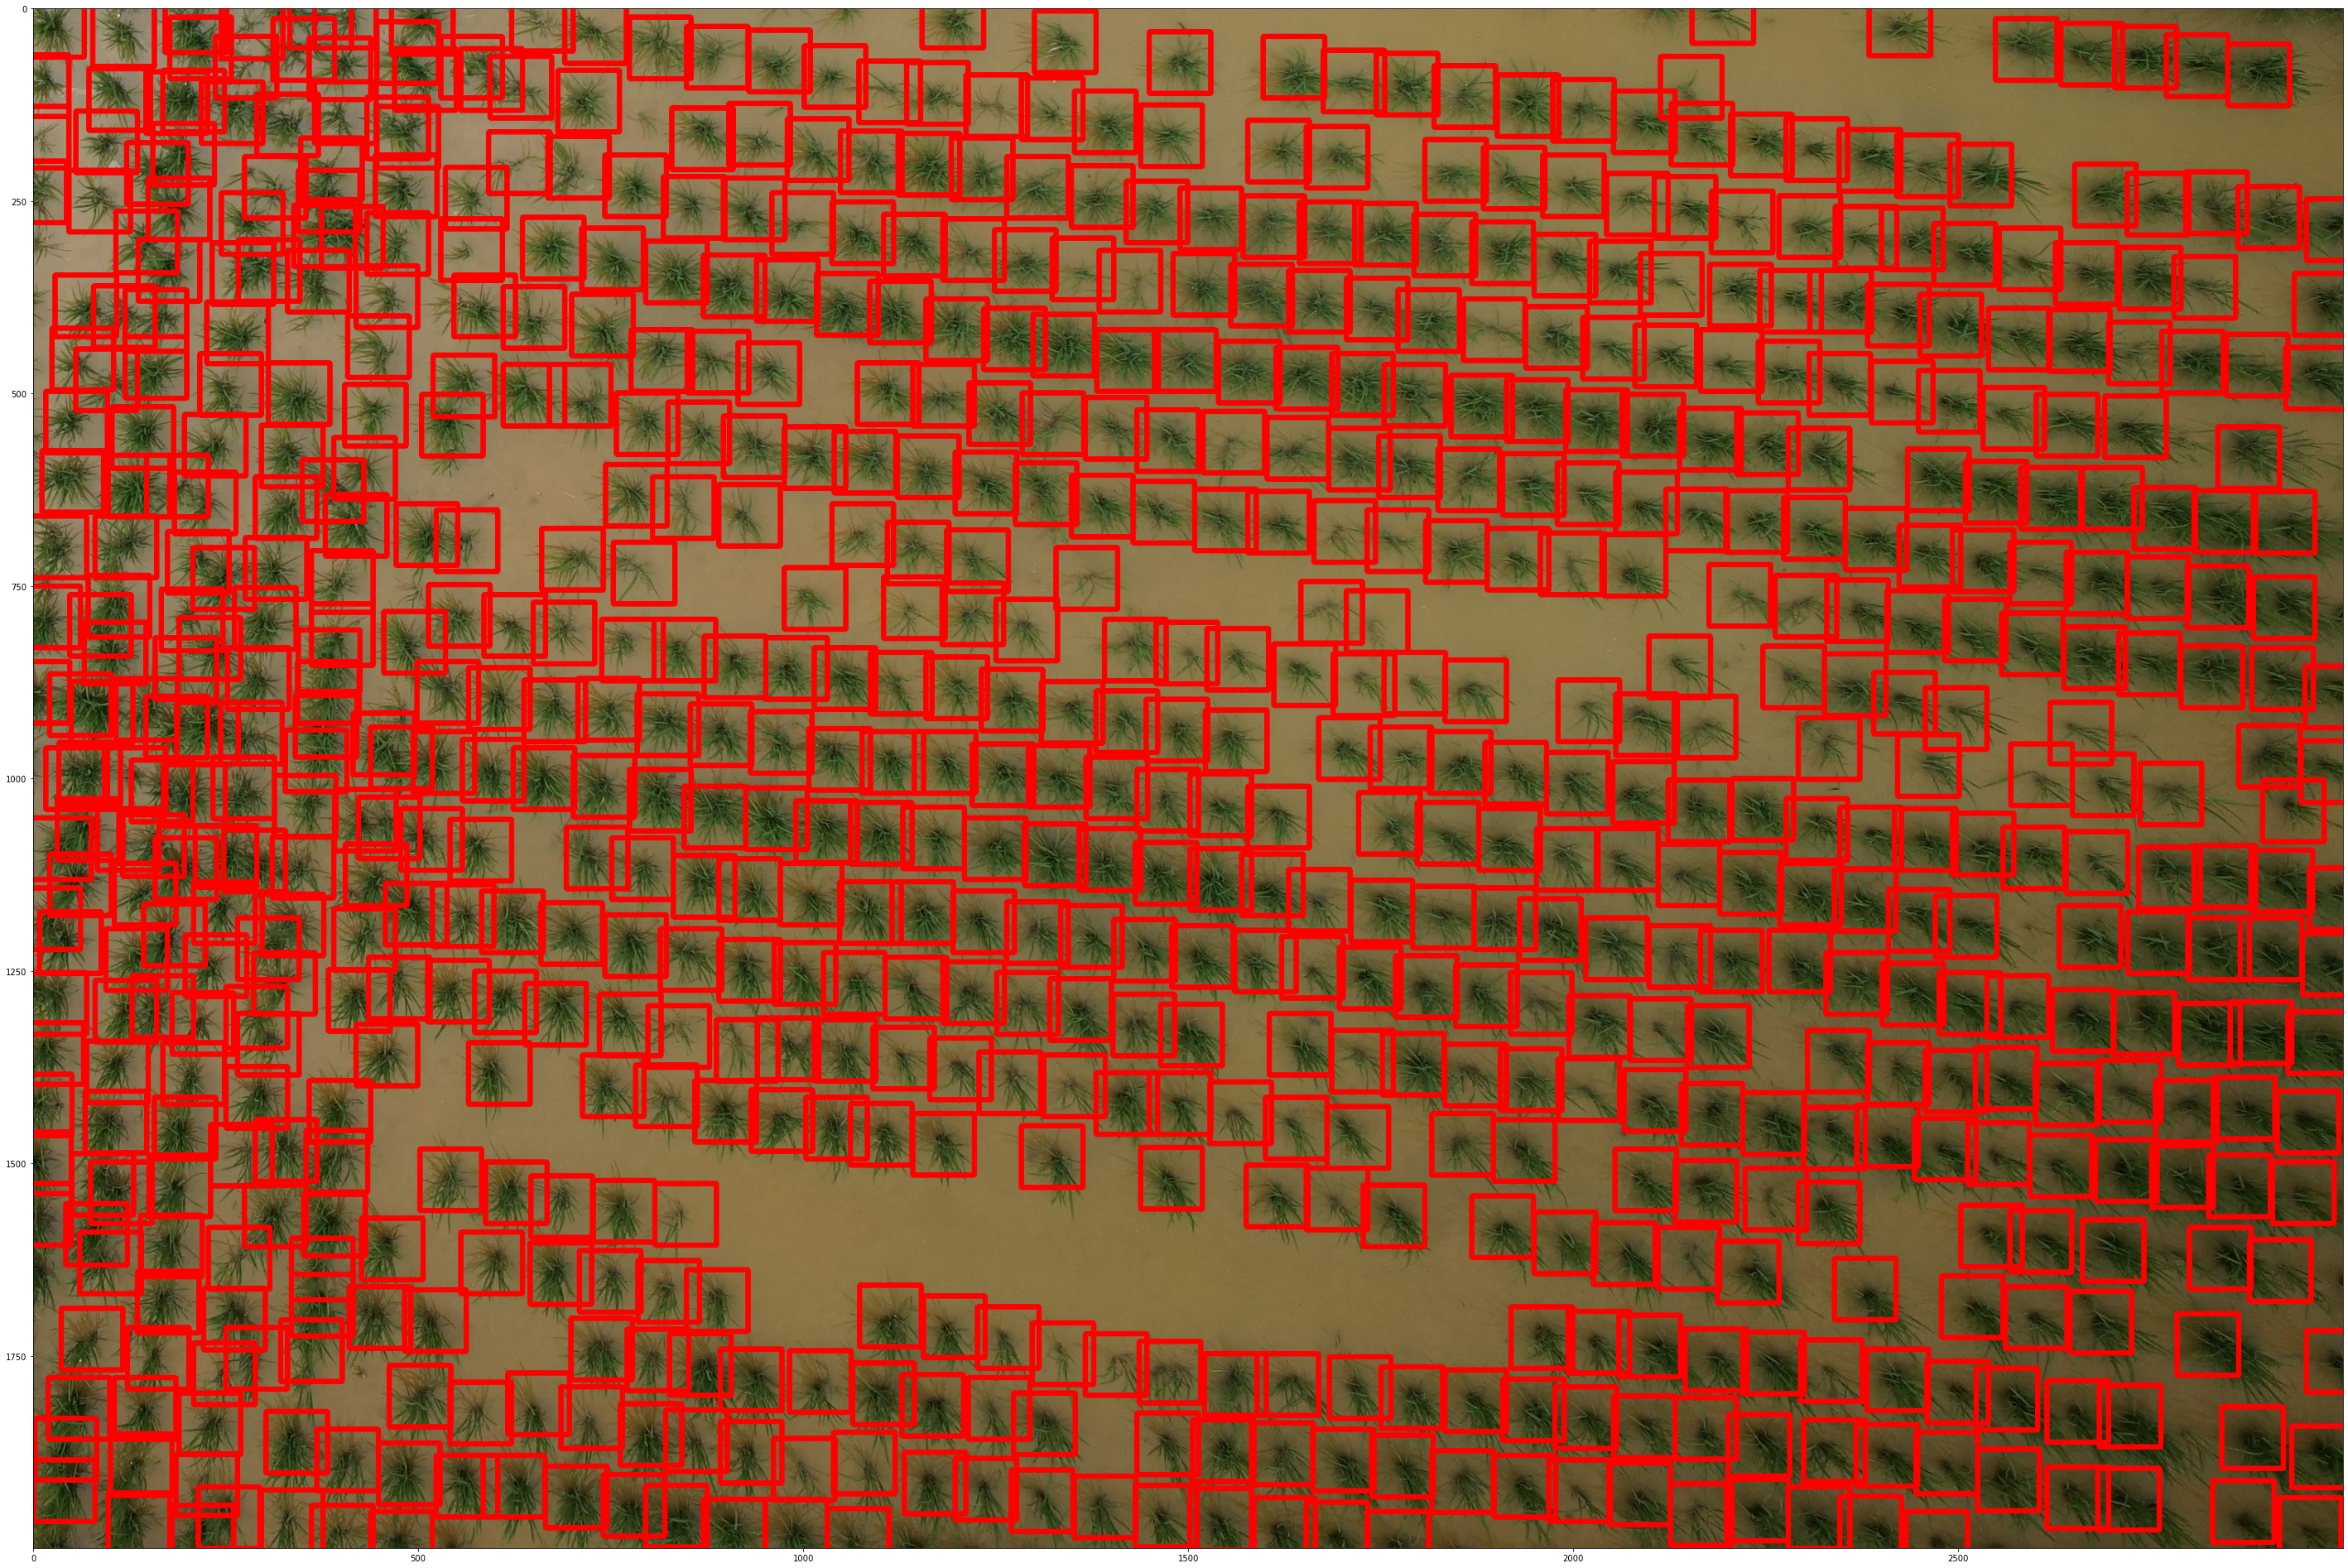

In [22]:
img = cv2.imread("Train_Dev/Train_Dev/training/DSC080454.JPG")

data_csv = pd.read_csv("Train_Dev/Train_Dev/train_labels/DSC080454.csv", header=None)
data_array = np.array(data_csv)
for i in range(len(data_array)):
    #img = cv2.circle(img, tuple(data_array[i]) , 20, (0,0,255), 5)
    wh = 40
    x = data_array[i][0]
    y = data_array[i][1]
    img = cv2.rectangle(img, (x-wh,y-wh),(x+wh,y+wh), (0,0,255), 5)

plt.figure(figsize=(50,50))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
def yolo(img_name):
    img = cv2.imread("Train_Dev/Train_Dev/training/"+ img_name)

    data_csv = pd.read_csv("Train_Dev/Train_Dev/train_labels/" + img_name[:-4] + ".csv", header=None)
    data_array = np.array(data_csv)

    label = "0"
    text = ""
    (h, w, _) = img.shape
    for i in range(len(data_array)):
        yolo_x = data_array[i][0]/w
        if yolo_x<0: 
            yolo_x = 0
        if yolo_x>1: 
            yolo_x = 1
        yolo_y = data_array[i][1]/h
        if yolo_y<0: 
            yolo_y = 0
        if yolo_y>1: 
            yolo_y = 1
        
        yolo_w = 80/w
        yolo_h = 80/h
        text +=  label + " " + str(yolo_x) + " "+ str(yolo_y) + " " + str(yolo_w) + " " + str(yolo_h) + "\n"
    
    fp = open(img_name[:-4]+".txt","w")
    fp.write(text)
    fp.close()

In [33]:
img_name = glob.glob("Train_Dev/Train_Dev/training/*JPG")
for i in range(len(img_name)):
    basename = os.path.basename(img_name[i])
    yolo(basename)